# 機械学習　効果測定（回帰）

## ※ 準備作業
### ▶ 以下を実施。

In [426]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# auto_mgp.csv のアップロード

In [427]:
cd data

[Errno 2] No such file or directory: 'data'
/content/data


## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [428]:
!pip install japanize-matplotlib

## データ分析対象データ

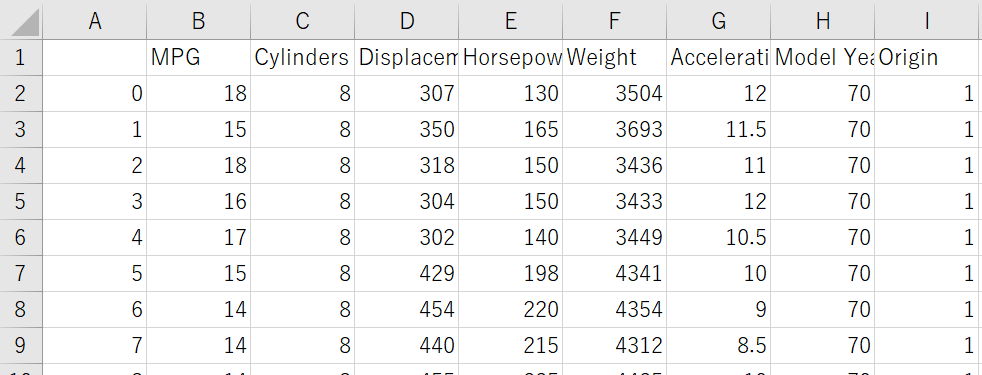

## ■ 正解データ　：　MPG

## ■ 特徴量候補　：　Cylinders、Displacement、Horsepower、	Weight、Acceleration、Model Year、Origin



## 本データのデータ分析において使用する各種ライブラリをインポートする。
## また、グラフ表示が同一タブ上に表示する。

In [429]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import japanize_matplotlib 

CSVファイル diabetes.csv を読み込む。

In [430]:
df = pd.read_csv('auto_mgp.csv')

読み込んだCSVファイルの先頭５行と末尾５行を表示。

In [431]:
df.head(5)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


In [432]:
df.tail(5)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,393,27.0,4,140.0,86.0,2790,15.6,82,1
394,394,44.0,4,97.0,52.0,2130,24.6,82,2
395,395,32.0,4,135.0,84.0,2295,11.6,82,1
396,396,28.0,4,120.0,79.0,2625,18.6,82,1
397,397,31.0,4,119.0,82.0,2720,19.4,82,1


列の削除（Unnamed: 0）

In [433]:
df = df.drop('Unnamed: 0',axis = 1)

In [434]:
#削除されたか確認
df.head(5) #先頭５行

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [435]:
#削除されたか確認
df.tail(5) #末尾５行

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


Model YearとOriginは計算に使ったとして意味がありそうなデータではないため、質的データとして考え、ダミー変数化する。

In [436]:
#Model Year（発表年）をダミー変数化
model_year = pd.get_dummies(df['Model Year'], drop_first = True)
model_year

,71,72,73,74,75,76,77,78,79,80,81,82
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,0,1
394,0,0,0,0,0,0,0,0,0,0,0,1
395,0,0,0,0,0,0,0,0,0,0,0,1
396,0,0,0,0,0,0,0,0,0,0,0,1


In [437]:
#Origin（アメ車、欧州車、日本車）をダミー変数化
origin = pd.get_dummies(df['Origin'], drop_first = True)
origin

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
393,0,0
394,1,0
395,0,0
396,0,0


ダミー変数化したものを連結させる


In [438]:
#まずはdfから、Model Year列とOrigin列を削除する
df = df.drop('Model Year',axis = 1)
df = df.drop('Origin',axis = 1)
df #表示

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


In [439]:
#次にdfにダミー変数化の処理が完了した列を連結させる
#ダミー変数化した列⇒「model_year」と「origin」
#まずはmodel_yearから！
df = pd.concat([df, model_year], axis = 1)
df.head(5) #先頭５行表示

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,71,72,73,74,75,76,77,78,79,80,81,82
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,0,0,0,0,0,0,0,0,0


In [440]:
#続いてoriginを連結！
df = pd.concat([df, origin], axis = 1)
df.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,71,72,73,74,75,76,77,78,79,80,81,82,2,3
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 訓練データ、検証データ、テストデータに分割。
### ※訓練データとテストデータの比率は８：２、乱数シードは０

In [441]:
#train_val ⇒ 訓練データ＆検証データ、test ⇒ テストデータ。
#testはしばらく使わない。
train_val, test = train_test_split(df, test_size=0.2, random_state=0)

訓練データにおいて、欠損値を確認して表示する

In [442]:
print('【訓練データの欠損値数】')
print(train_val.isnull().sum()) #訓練データの欠損値数の表示

【訓練データの欠損値数】
MPG             0
Cylinders       0
Displacement    0
Horsepower      5
Weight          0
Acceleration    0
71              0
72              0
73              0
74              0
75              0
76              0
77              0
78              0
79              0
80              0
81              0
82              0
2               0
3               0
dtype: int64


## 欠損値処理

In [443]:
train_val_mean = train_val.mean() #平均の算出
train_val2 = train_val.fillna(train_val_mean) #平均値で穴埋め
print('【欠損値処理後の訓練データ】')
train_val2.head(5) #欠損値処理後の訓練データの先頭５行

【欠損値処理後の訓練データ】


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,71,72,73,74,75,76,77,78,79,80,81,82,2,3
64,15.0,8,318.0,150.0,4135,13.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
55,27.0,4,97.0,60.0,1834,19.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
317,34.3,4,97.0,78.0,2188,15.8,0,0,0,0,0,0,0,0,0,1,0,0,1,0
102,26.0,4,97.0,46.0,1950,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
358,31.6,4,120.0,74.0,2635,18.3,0,0,0,0,0,0,0,0,0,0,1,0,0,1


欠損値がないか再度確認

In [444]:
print('【訓練データの欠損値数】')
print(train_val2.isnull().sum()) #訓練データの欠損値数の表示

【訓練データの欠損値数】
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
71              0
72              0
73              0
74              0
75              0
76              0
77              0
78              0
79              0
80              0
81              0
82              0
2               0
3               0
dtype: int64


欠損値がないことを確認できたので、外れ値処理に進む

外れ値処理

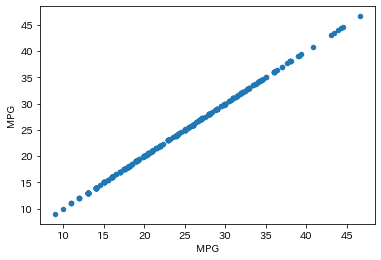

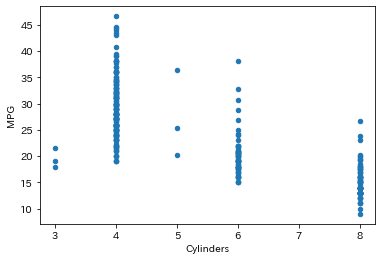

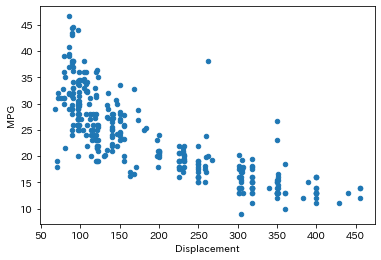

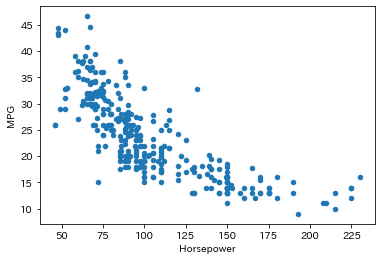

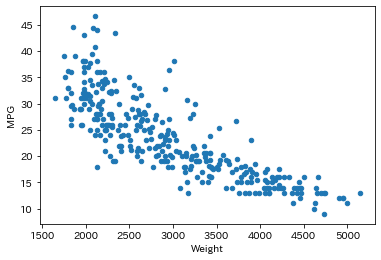

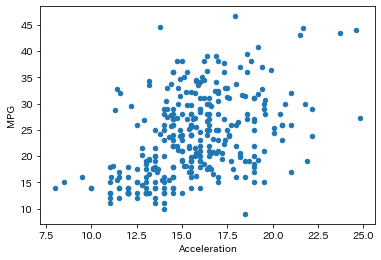

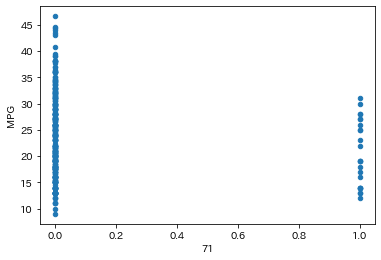

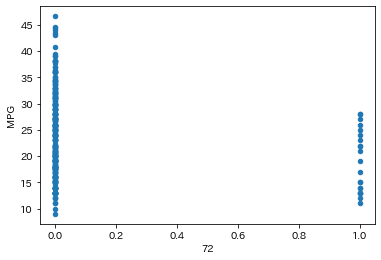

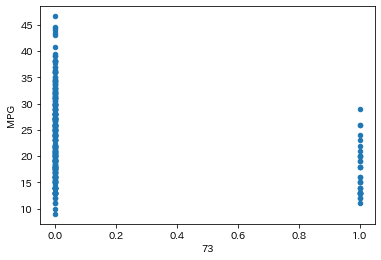

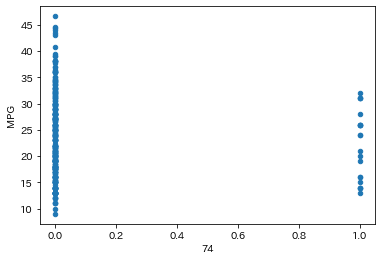

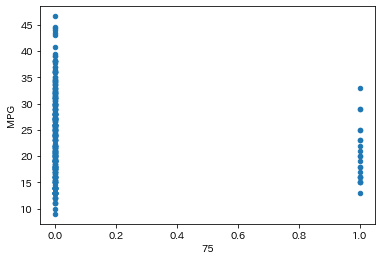

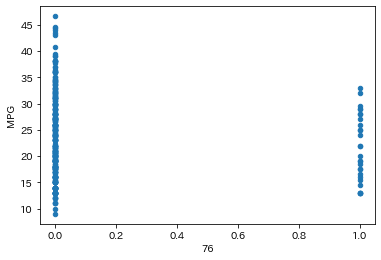

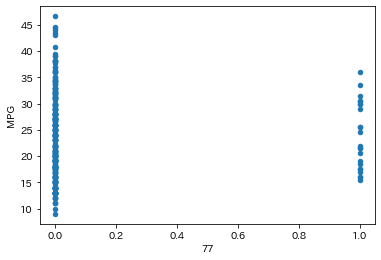

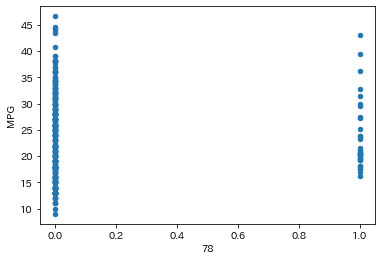

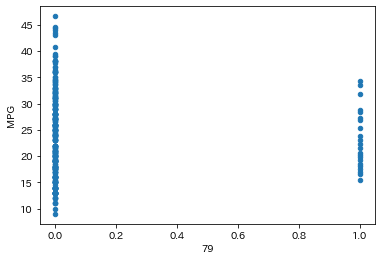

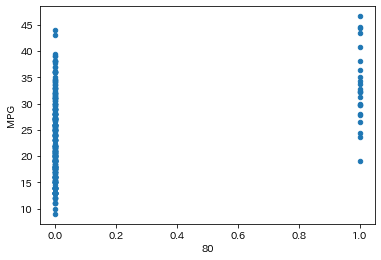

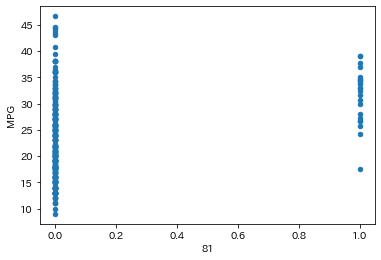

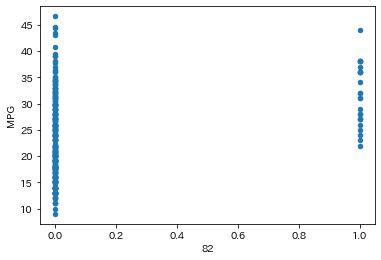

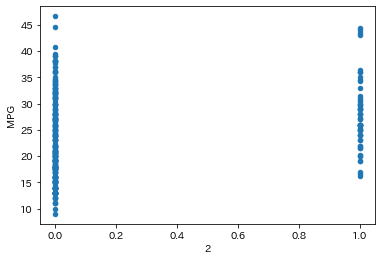

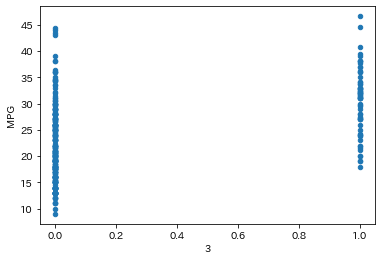

In [445]:
#各特徴量の列とMPG列の相関関係を示す散布図を描く
colname = train_val2.columns 
for name in colname:
  train_val.plot(kind = 'scatter', x = name, y = 'MPG')

In [446]:
#外れ値が存在するインデックスを確認する
#Displacementの外れ値
out_line1 = train_val2[(train_val2['Displacement'] > 250)&(train_val2['MPG']>35)].index
print('【外れ値のインデックス】')
print(out_line1[0])

【外れ値のインデックス】
387


In [447]:
#外れ値を削除する
train_val2 = train_val2.drop([387], axis = 0)#Displacementの外れ値を削除

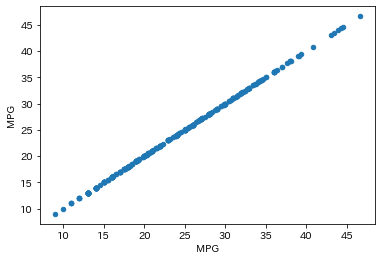

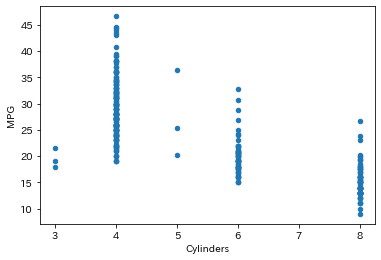

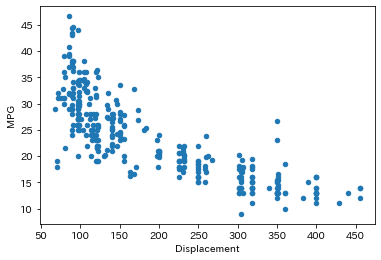

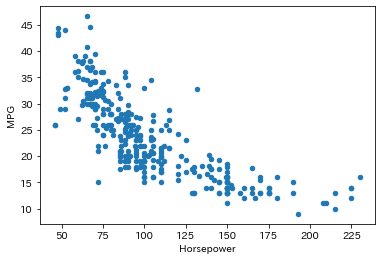

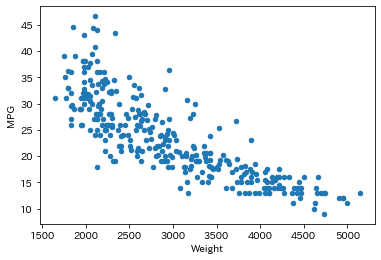

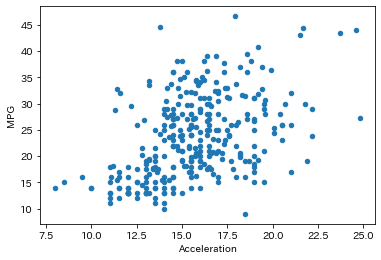

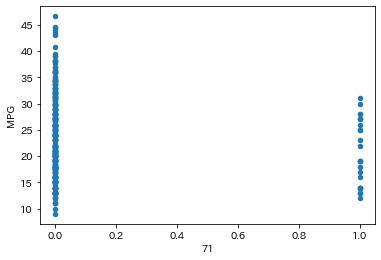

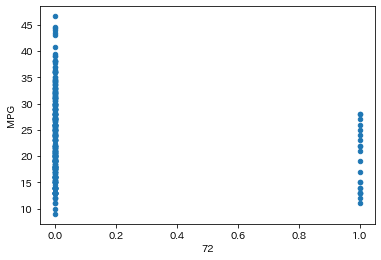

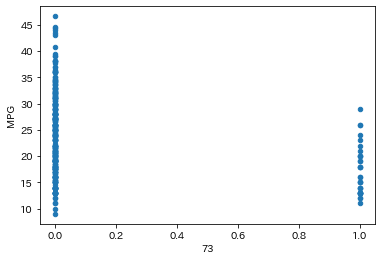

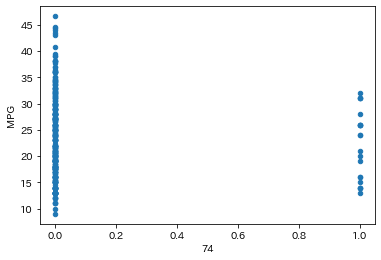

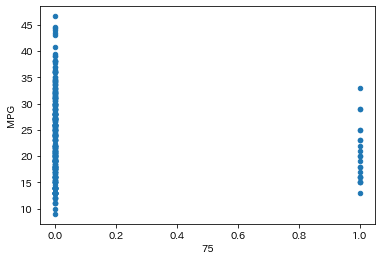

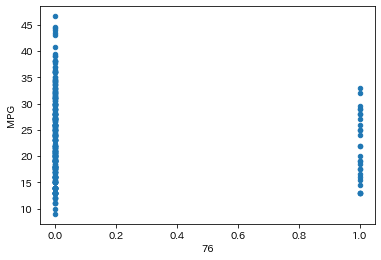

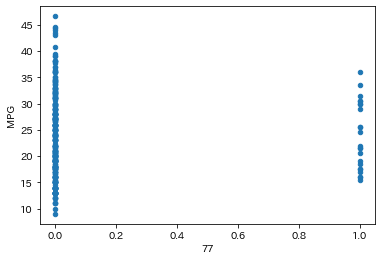

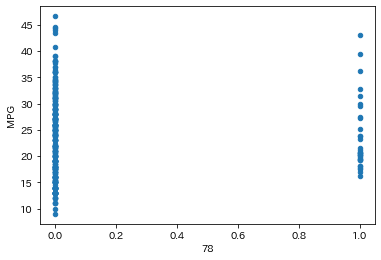

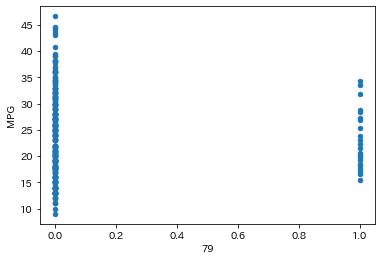

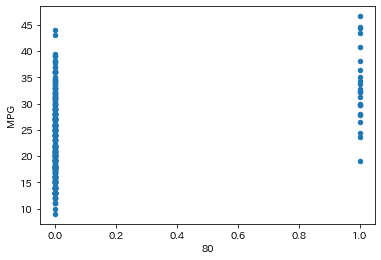

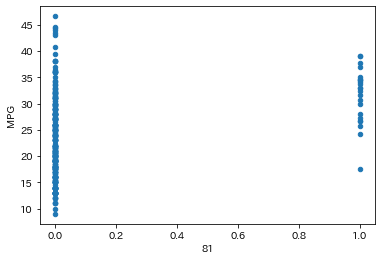

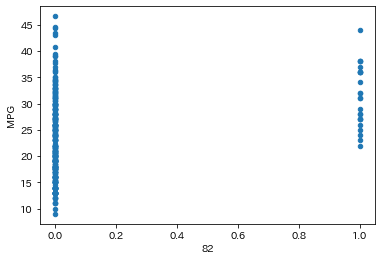

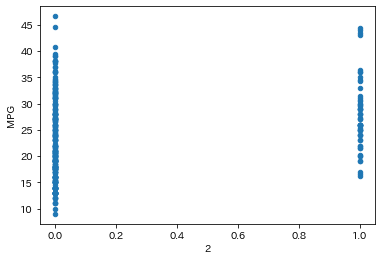

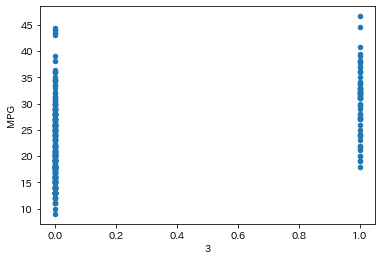

In [448]:
#各特徴量の列とMPG列の相関関係を示す散布図を描く
colname2 = train_val2.columns 
for name in colname2:
  train_val2.plot(kind = 'scatter', x = name, y = 'MPG')

## 相関係数を表示する

In [449]:
#各列とMPGの相関係数を表示
train_cor = train_val2.corr()['MPG']
train_cor

MPG             1.000000
Cylinders      -0.772369
Displacement   -0.807965
Horsepower     -0.788586
Weight         -0.828652
Acceleration    0.462570
71             -0.109018
72             -0.151068
73             -0.278431
74             -0.044470
75             -0.111780
76             -0.076642
77              0.012304
78              0.005519
79             -0.012431
80              0.358021
81              0.290457
82              0.297772
2               0.253290
3               0.460675
Name: MPG, dtype: float64

In [450]:
#MPG列との相関係数を絶対値に変換
abs_cor = train_cor.map(abs)
#降順に並べ替え
abs_cor.sort_values(ascending=False)

MPG             1.000000
Weight          0.828652
Displacement    0.807965
Horsepower      0.788586
Cylinders       0.772369
Acceleration    0.462570
3               0.460675
80              0.358021
82              0.297772
81              0.290457
73              0.278431
2               0.253290
72              0.151068
75              0.111780
71              0.109018
76              0.076642
74              0.044470
79              0.012431
77              0.012304
78              0.005519
Name: MPG, dtype: float64

正解データと特徴量を抽出し、それぞれの先頭５行を表示

In [451]:
#特徴量⇒Cylinders,Displacement,Horsepower,Weight ※相関係数0.5以上をまずは採用
#正解データ⇒MPG
col = ['MPG','Cylinders','Displacement','Horsepower','Weight'] 

train_val3 = train_val2[col]
train_val3.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight
64,15.0,8,318.0,150.0,4135
55,27.0,4,97.0,60.0,1834
317,34.3,4,97.0,78.0,2188
102,26.0,4,97.0,46.0,1950
358,31.6,4,120.0,74.0,2635


上で抽出した正解データと特徴量を使用して、訓練データと検証データに分割する。

※訓練データと検証データの比率は８：２、乱数シードは０

In [452]:
#特徴量
col2 = ['Cylinders','Displacement','Horsepower','Weight'] 
x = train_val3[col2] 
#正解データ
t = train_val3[['MPG']] 

#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)

標準化処理をする

In [453]:
#標準化処理用のモジュールをインポートする
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)

#各列のデータを標準化してsc_xに代入
sc_x = sc_model_x.transform(x_train)
sc_x #表示

array([[-0.85464765, -0.93102899, -0.98364585, -0.97609031],
       [-0.85464765, -1.04979137, -1.03750162, -1.12530316],
       [-1.44062558, -1.0992757 ,  0.17425303, -0.2897112 ],
       ...,
       [-0.85464765, -0.68360737, -0.2027373 , -0.79106637],
       [-0.85464765, -0.92113213, -0.95671797, -1.09546059],
       [-0.85464765, -0.93102899, -0.76822281, -0.96415328]])

In [454]:
#ちゃんと標準化できているか確認します
#平均値０かどうか
#array型だと見づらいのでデータフレームに変換

tmp_df = pd.DataFrame(sc_x, columns = x_train.columns)
#平均値の計算
tmp_df.mean()

Cylinders      -8.162114e-17
Displacement   -1.158494e-16
Horsepower      2.031752e-16
Weight          1.799176e-17
dtype: float64

In [455]:
#正解データの標準化
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)

sc_y = sc_model_y.transform(y_train)

In [456]:
#標準化されたデータで学習
model = LinearRegression() #線形重回帰モデルを使用
model.fit(sc_x, sc_y) #標準化済みの訓練データで学習


LinearRegression()

In [457]:
model.score(x_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


-33775.204977751

標準化前のデータのため、正確でないスコア

In [458]:
#検証データの標準化
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)
#標準化したデータで決定係数を計算
model.score(sc_x_val, sc_y_val)

0.6765610506100268

特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにする

In [459]:
from sklearn.preprocessing import StandardScaler

#learn関数の定義
def learn(x, t):
  x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)
  
  #訓練データを標準化
  sc_model_x = StandardScaler()
  sc_model_y = StandardScaler()
  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)
  sc_model_y.fit(y_train)
  sc_y_train = sc_model_y.transform(y_train)

  #学習
  model = LinearRegression()
  model.fit(sc_x_train, sc_y_train)

  #検証データを標準化
  sc_x_val = sc_model_x.transform(x_val)
  sc_y_val = sc_model_y.transform(y_val)
    
  #訓練データと検証データの決定係数計算
  train_score = model.score(sc_x_train, sc_y_train)
  val_score = model.score(sc_x_val, sc_y_val)

  return train_score, val_score

In [460]:
#learn関数を実行する
x = train_val3.loc[:, ['Cylinders','Displacement','Horsepower','Weight']]
t = train_val3[['MPG']]

s1, s2 = learn(x, t)
print(s1, s2)

0.716437940863518 0.6765610506100268


In [461]:
#特徴量を２乗したデータ列を追加して再学習
x['Weight2'] = x['Weight'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)

0.7393159050904567 0.719251497288964


決定係数が上がったので採用

In [462]:
#交互作用特徴量を追加して再学習
x['Horsepower * Displacement'] = x['Horsepower'] * x['Displacement']
s1, s2 = learn(x, t)
print(s1, s2)

0.7642379077594583 0.7659746360482462


決定係数が上がったので採用

In [463]:
#特徴量を３乗したデータ列を追加して再学習
x['Weight3'] = x['Weight'] ** 3
s1, s2 = learn(x, t)
print(s1, s2)

0.7643580834617809 0.7670287613821171


少しだけ決定係数が上がったので採用。


In [464]:
#特徴量を４乗したデータ列を追加して再学習
x['Weight4'] = x['Weight'] ** 4
s1, s2 = learn(x, t)
print(s1, s2)

0.7654765853350234 0.772361785011919


さっきよりも決定係数が上がったため採用

In [465]:
#特徴量を５乗したデータ列を追加して再学習
x['Weight5'] = x['Weight'] ** 5
s1, s2 = learn(x, t)
print(s1, s2)

0.7662624035465653 0.7734493411932599


まだ決定係数が上がったので採用

In [466]:
#特徴量を６乗したデータ列を追加して再学習
x['Weight6'] = x['Weight'] ** 6
s1, s2 = learn(x, t)
print(s1, s2)

0.7662695094977867 0.7735394527448086


上がったので採用。

決定係数の上がり方が鈍化してきたので、一旦Weight同士の乗算はここまでにしておく。

In [467]:
#特徴量を２乗したデータ列を追加して再学習
#x['Displacement2'] = x['Displacement'] ** 2
#s1, s2 = learn(x, t)
#print(s1, s2)

(0.7684735981538828 0.7454123638482077)

決定係数が下がったので不採用

In [468]:
#特徴量を２乗したデータ列を追加して再学習
#x['Horsepower2'] = x['Horsepower'] ** 2
#s1, s2 = learn(x, t)
#print(s1, s2)

(0.767743818194547 0.7669160543033313)

決定係数が下がったので不採用

In [469]:
 #特徴量を２乗したデータ列を追加して再学習
#x['Cylinders2'] = x['Cylinders'] ** 2
#s1, s2 = learn(x, t)
#print(s1, s2)

(0.7695769835469186 0.7602352722196307)

決定係数が下がったので不採用

決定係数が伸び悩んでいるので、別の回帰で試してみる

In [470]:
#累乗列と交互作用特徴量を一括追加してみる
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)
pf_x = pf.fit_transform(x)
pf_x.shape

(317, 65)

In [471]:
pf.get_feature_names() #列名の確認

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x8^2',
 'x8 x9',
 'x9^2']

列が非常に多いので、不要な特徴量を削除して回帰式を作成するラッソ回帰の実装で試してみる

In [472]:
#ライブラリインポート
from sklearn.linear_model import Lasso

x_train, x_test, y_train, y_test = train_test_split(pf_x, t, test_size = 0.3, random_state = 0)

#ラッソ回帰のモデル作成(alphaは正規化項につく定数)
model2 = Lasso(alpha = 0.1)
model2.fit(x_train, y_train)

print(model2.score(x_train, y_train)) #訓練データの決定係数
print(model2.score(x_test, y_test)) #テストデータの決定係数

0.8003057560235709
0.7051955902713519


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.264e+03, tolerance: 1.259e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [473]:
#回帰式の係数を確認する
model2_weight = model2.coef_ #係数抜き出す
#見やすいようにシリーズ変換
pd.Series(model2_weight, index = pf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


x0      -0.000000e+00
x1      -1.437052e-01
x2      -1.357068e-01
x3       9.184328e-03
x4       4.784806e-08
             ...     
x7 x8    3.070521e-35
x7 x9    4.345525e-34
x8^2    -1.225050e-38
x8 x9   -1.114926e-37
x9^2    -4.908829e-39
Length: 65, dtype: float64

線形重回帰を用いたモデルよりの最終的な決定係数より高くないので、特徴量を増やして再検証

In [474]:
#累乗列と交互作用特徴量を一括追加してみる ⇒　3乗を追加
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3, include_bias=False)
pf_x = pf.fit_transform(x)
pf_x.shape

(317, 285)

In [475]:
x_train, x_test, y_train, y_test = train_test_split(pf_x, t, test_size = 0.3, random_state = 0)

#ラッソ回帰のモデル作成(alphaは正規化項につく定数)
model3 = Lasso(alpha = 0.1)
model3.fit(x_train, y_train)

print(model3.score(x_train, y_train)) #訓練データの決定係数
print(model3.score(x_test, y_test)) #テストデータの決定係数

0.8100782958152017
0.6495714764232392


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.203e+03, tolerance: 1.259e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


下がってしまったので不採用

線形重回帰モデルの方が決定係数をより高く上げることができたので、線形重回帰モデルを採用することにする

In [476]:
#訓練データと検証データを合わせて再学習させるので
#再度、標準化する
#最も決定係数の数値が高かった、線形重回帰モデルを採用
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)
model = LinearRegression()
model.fit(sc_x, sc_y)

LinearRegression()

In [477]:
#テストデータの前処理
test2 = test.fillna(train_val.mean()) #欠損値を平均値で補完
x_test = test2.loc[:,['Cylinders','Displacement','Horsepower','Weight']]
y_test = test2[['MPG']]
#増やした特徴量の列も前処理する
x_test['Weight2'] = x_test['Weight'] ** 2
x_test['Horsepower * Displacement'] = x_test['Horsepower'] * x_test['Displacement']
x_test['Weight3'] = x_test['Weight'] ** 3
x_test['Weight4'] = x_test['Weight'] ** 4
x_test['Weight5'] = x_test['Weight'] ** 5
x_test['Weight6'] = x_test['Weight'] ** 6

sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_y2.transform(y_test)

In [478]:
#前処理をしたデータを渡し、決定係数を計算してみます
model.score(sc_x_test, sc_y_test)

0.7186499621492952

まずまずの結果です

In [479]:
x.head(3) #xを表示して列名の確認をします

,Cylinders,Displacement,Horsepower,Weight,Weight2,Horsepower * Displacement,Weight3,Weight4,Weight5,Weight6
64,8,318.0,150.0,4135,17098225,47700.0,70701160375,292349298150625,1208864347852834375,-413565603818347311
55,4,97.0,60.0,1834,3363556,5820.0,6168761704,11313508965136,20748975442059424,1160132813317880384
317,4,97.0,78.0,2188,4787344,7566.0,10474708672,22918662574336,50146033712647168,-960942678985306112


In [480]:
#ランダムな値を入れて予測してみる
new = [[8,200,100,4000,10000,1000000,1000000,100000,1000000,10000000]] #適当に当てはめてみました
model.predict(new)

array([[2.31752898e+08]])

とても燃費の悪そうな結果です

モデルの保存をする

In [481]:
#モデルの保存
#標準化を行ったため、StandardScaler(sc_model_x、sc_model_y)オブジェクトも保存する
#未知のデータも標準化する必要があるため
import pickle
with open('auto_mpg.pkl', 'wb')as f:
  pickle.dump(model, f)
with open('auto_mpg_sc_x.pkl', 'wb')as f:
  pickle.dump(sc_model_x2, f)
with open('auto_mpg_sc_y.pkl', 'wb')as f:
  pickle.dump(sc_model_y2, f)